<a href="https://colab.research.google.com/github/norhum/deep_learning/blob/main/MNIST1-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [8]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, drop_last=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, drop_last=True)

In [11]:
class SimpleNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.ff1 = nn.Linear(28*28, 256)
    self.ff2 = nn.Linear(256, 10)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = torch.relu(self.ff1(x))
    x = self.ff2(x)
    return x

class SimpleCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.cnn1 = nn.Conv2d(1, 3, (3,3), padding=1) #batch,3,28,28
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2) #batch,3,14,14
    self.cnn2 = nn.Conv2d(3, 5, (3,3), padding=1) #batch,5,14,14
    self.fc = nn.Linear(5*14*14, 10) #batch, 10

  def forward(self, x):
    x = self.pool(F.relu(self.cnn1(x)))
    x = F.relu(self.cnn2(x))
    x = x.view(-1, 5*14*14)
    x = self.fc(x)
    return x

In [12]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [13]:
epochs = 5
for epoch in range(epochs):
  running_loss = 0.0
  for images, labels in trainloader:
    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f'Epoch: {epoch+1}, Loss: {running_loss/len(trainloader)}')

Epoch: 1, Loss: 0.22166918787763334
Epoch: 2, Loss: 0.08554699766725946
Epoch: 3, Loss: 0.06966688164997858
Epoch: 4, Loss: 0.060030563491701744
Epoch: 5, Loss: 0.053979521313644425


In [14]:
correct = 0
total = 0
with torch.no_grad():
  for images, labels in testloader:
    outputs = model(images)
    _, indices = torch.max(outputs, dim=1)
    correct += (indices == labels).sum().item()
    total += labels.shape[0]

print(f'test data accuracy: {correct/total:.4f}')

test data accuracy: 0.9804


In [43]:
import matplotlib.pyplot as plt

intelligible = []
answers = []
model_predictions = []

with torch.no_grad():
  for images, labels in testloader:
    outputs = model(images)
    _, indices = torch.max(outputs, dim=1)
    incorrect = labels != indices

    if sum(incorrect) != 0:
      answer = labels[incorrect]
      model_prediction = indices[incorrect]

      answers.append(answer)
      model_predictions.append(model_prediction)
      intelligible.append(images[incorrect])

intelligible = torch.cat(intelligible)
answers = torch.cat(answers)
model_predictions = torch.cat(model_predictions)

print(intelligible.shape, answers.shape, model_predictions.shape)

torch.Size([196, 1, 28, 28]) torch.Size([196]) torch.Size([196])


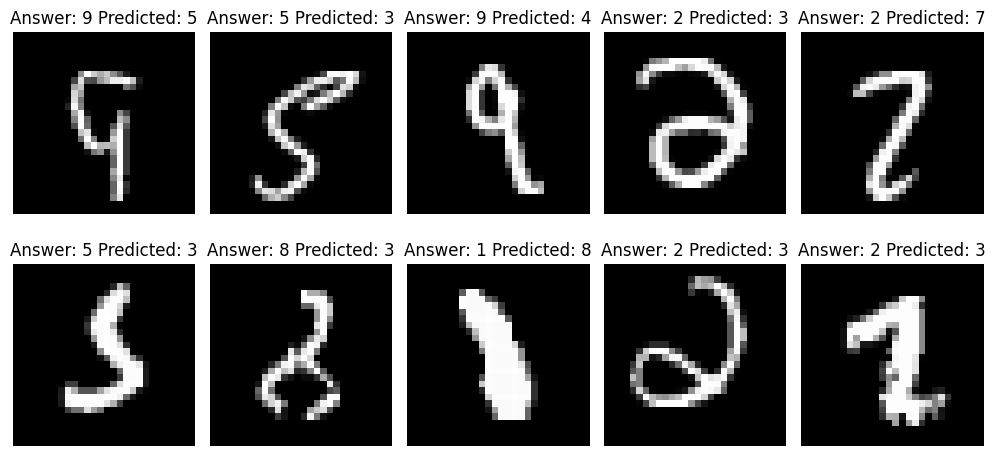

In [45]:
plt.figure(figsize=(10, 5))

# Plot the first 10 images
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid, 1-based index
    plt.imshow(intelligible[i][0], cmap='gray')  # Display the image
    plt.title(f'Answer: {answers[i]} Predicted: {model_predictions[i]}')  # Show the label
    plt.axis('off')  # Hide the axes

# Show the plot
plt.tight_layout()
plt.show()